# <center>Деревья классификации</center>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Рассмотрим задачу бинарной классификации. Сгенерируем обучающую выборку и сохраним её в переменные `(train_data, train_labels)`. Каждый объект характеризуется парой признаков $x_1$ и $x_2$.

In [2]:
np.random.seed(67)
points = np.random.uniform(size=(20, 2), low=-1, high=1)
positive = points[np.logical_xor(points[:, 0] >= 0, points[:, 1] >= 0)]
negative = points[np.logical_xor(points[:, 0] >= 0, points[:, 1] < 0)]
train_data = np.vstack([positive, negative])
train_labels = np.hstack([np.ones(positive.shape[0]), np.zeros(negative.shape[0])])

In [3]:
train_data[:5]

array([[ 0.37178517, -0.33681636],
       [-0.57370028,  0.8650133 ],
       [ 0.4456366 , -0.90620939],
       [-0.91362246,  0.91001759],
       [-0.20464543,  0.05931678]])

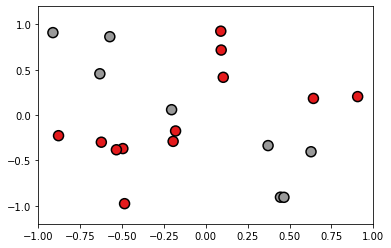

In [4]:
plt.scatter(train_data[:, 0], train_data[:, 1], 
            c=train_labels, s=100, cmap='Set1', edgecolors='black', linewidth=1.5)
plt.xlim(-1, 1)
plt.ylim(-1.2, 1.2)
plt.show()

**Задание 1.** Выберите предикаты, по которым проводить разбиение. Постройте дерево решений для данной задачи. Какой глубины будет оптимальное дерево?

In [5]:
xR = train_data[train_data[:,0] > 0]
yR = train_labels[train_data[:,0] > 0]

xL = train_data[train_data[:,0] <= 0]
yL = train_labels[train_data[:,0] <= 0]

In [7]:
# справа сверху красные точки
xRU = xR[xR[:,1] > 0]
yRU = yR[xR[:,1] > 0]

# справа снизу серые точки
xRD = xR[xR[:,1] <= 0]
yRD = yR[xR[:,1] <= 0]

# слева сверху серые точки
xLU = xL[xL[:,1] > 0]
yLU = yL[xL[:,1] > 0]

# слева снизу красные точки
xLD = xL[xL[:,1] <= 0]
yLD = yL[xL[:,1] <= 0]

In [8]:
xRU, yRU

(array([[0.09170286, 0.71771322],
        [0.6426217 , 0.183739  ],
        [0.10395568, 0.41695126],
        [0.90684911, 0.20384961],
        [0.08922865, 0.92616443]]),
 array([0., 0., 0., 0., 0.]))

In [9]:
xRD, yRD

(array([[ 0.37178517, -0.33681636],
        [ 0.4456366 , -0.90620939],
        [ 0.62832698, -0.40471628],
        [ 0.46648013, -0.90772004]]),
 array([1., 1., 1., 1.]))

In [10]:
xLU, yLU

(array([[-0.57370028,  0.8650133 ],
        [-0.91362246,  0.91001759],
        [-0.20464543,  0.05931678],
        [-0.63320905,  0.45599468]]),
 array([1., 1., 1., 1.]))

In [11]:
xLD, yLD

(array([[-0.88000414, -0.22744444],
        [-0.49585698, -0.36984662],
        [-0.62432396, -0.29936019],
        [-0.48551438, -0.97777177],
        [-0.18082298, -0.1754911 ],
        [-0.53437417, -0.38279009],
        [-0.19549686, -0.2901396 ]]),
 array([0., 0., 0., 0., 0., 0., 0.]))

**Задание 2.** При построении деревьев классификации используются различные критерии информативности. Сравните начальную энтропию и начальное значение критерия Джини в данной задаче.

$$S_0=-p log_2 p-(1-p)log_2(1-p)$$
$$G_0=1-p^2-(1-p)^2$$

In [18]:
from math import log2

In [17]:
p = len(train_labels[train_labels == 1]) / len(train_labels) #вероятность 1
p

0.4

In [19]:
s0 = - p*log2(p) - (1-p)*log2(1-p) # начальная энтропия
s0

0.9709505944546686

In [20]:
g0 = 1 - p**2 - (1-p)**2 # начальное значение критерия Джини
g0

0.48

**Задание 3.** Определите набор предикатов для данной задачи. Для этого напишите функцию, которая по значениям признака и целевой переменной возвращает список предикатов для выбранного признака. Получите все предикаты по **всем** признакам.

In [32]:
points = pd.DataFrame({'x1' : train_data[:,0], 'x2' : train_data[:,1], 'y' : train_labels})
points.head(10)

,x1,x2,y
0,0.371785,-0.336816,1.0
1,-0.573700,0.865013,1.0
2,0.445637,-0.906209,1.0
3,-0.913622,0.910018,1.0
4,-0.204645,0.059317,1.0
5,0.628327,-0.404716,1.0
6,-0.633209,0.455995,1.0
7,0.466480,-0.907720,1.0
8,0.091703,0.717713,0.0
9,-0.880004,-0.227444,0.0


In [38]:
sortByX1 = points.sort_values('x1')
sortByX2 = points.sort_values('x2')

In [51]:
def findPredicates(x, y):
    predicates = []
    for i in range(len(y)-1):
        if y[i] - y[i+1] != 0:
            predicates.append( (x[i] + x[i+1]) / 2 )
    return predicates

In [53]:
predicatesX1 = findPredicates(list(sortByX1['x1']), list(sortByX1['y']))
predicatesX1

[-0.8968132995429501,
 -0.7566065949742614,
 -0.6287665022757317,
 -0.5990121190564968,
 -0.554037228654128,
 -0.34507990333227334,
 -0.2000711452800843,
 0.2378704257933334,
 0.6354743396903453]

In [54]:
predicatesX2 = findPredicates(list(sortByX2['x2']), list(sortByX2['y']))
predicatesX2 

[-0.9427459061178219,
 -0.3937531883073182,
 -0.3533314885967552,
 -0.3180882719395066,
 -0.05808715883026605,
 0.12152788893462807,
 0.43647296726164697,
 0.5868539488442623,
 0.7913632606727191,
 0.9180910094600978]

**Задание 4.** Для каждого полученного в задании 3 предиката вычислите прирост информации (IG) по **критерию Джини**. Какое правило предлагает поместить в корень дерева указанный критерий? Проведите такое разбиение.

In [82]:
def ig(x, g0, train_data, train_labels, axis):
    bestIG = -10000
    res = -10000
    for i in x:
        xR = train_data[train_data[:,axis] > i] # точки, которые уходят вправо
        yR = train_labels[train_data[:,axis] > i] # цвет точек
        
        if len(yR) != 0:
            pR = sum(yR) / len(yR) # вероятность точки с цветом 1 
        else:
            pR = 0
        gr = 1 - pR**2 - (1-pR)**2 # новый критерий Джини 

        xL = train_data[train_data[:,axis] <= i]
        yL = train_labels[train_data[:,axis] <= i]
        
        if len(yL) != 0:
            pL = sum(yL) / len(yL)
        else:
            pL = 0
        gL = 1 - pL**2 - (1-pL)**2
 
        delta = g0 - gr*(xR.shape[0] / len(train_data)) - gL*(xL.shape[0] / len(train_data))
        if delta >= bestIG:
            bestIG = delta
            res = i
    return res

In [83]:
bestIGx1 = ig(predicatesX1, g0, train_data, train_labels, 0)
bestIGx1

0.2378704257933334

In [84]:
bestIGx2 = ig(predicatesX2, g0, train_data, train_labels, 1)
bestIGx2

-0.3937531883073182

In [85]:
# разбиение по полученным показателям

xR = train_data[train_data[:,0] > bestIGx1]
yR = train_labels[train_data[:,0] > bestIGx1]

xL = train_data[train_data[:,0] <= bestIGx1]
yL = train_labels[train_data[:,0] <= bestIGx1]

# справа сверху красные точки
xRU = xR[xR[:,1] > bestIGx2]
yRU = yR[xR[:,1] > bestIGx2]

# справа снизу серые точки
xRD = xR[xR[:,1] <= bestIGx2]
yRD = yR[xR[:,1] <= bestIGx2]

# слева сверху серые точки
xLU = xL[xL[:,1] > bestIGx2]
yLU = yL[xL[:,1] > bestIGx2]

# слева снизу красные точки
xLD = xL[xL[:,1] <= bestIGx2]
yLD = yL[xL[:,1] <= bestIGx2]

In [86]:
xRU, yRU

(array([[ 0.37178517, -0.33681636],
        [ 0.6426217 ,  0.183739  ],
        [ 0.90684911,  0.20384961]]),
 array([1., 0., 0.]))

In [87]:
xRD, yRD

(array([[ 0.4456366 , -0.90620939],
        [ 0.62832698, -0.40471628],
        [ 0.46648013, -0.90772004]]),
 array([1., 1., 1.]))

In [88]:
xLU, yLU

(array([[-0.57370028,  0.8650133 ],
        [-0.91362246,  0.91001759],
        [-0.20464543,  0.05931678],
        [-0.63320905,  0.45599468],
        [ 0.09170286,  0.71771322],
        [-0.88000414, -0.22744444],
        [-0.49585698, -0.36984662],
        [-0.62432396, -0.29936019],
        [-0.18082298, -0.1754911 ],
        [-0.53437417, -0.38279009],
        [ 0.10395568,  0.41695126],
        [-0.19549686, -0.2901396 ],
        [ 0.08922865,  0.92616443]]),
 array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [89]:
xLD, yLD

(array([[-0.48551438, -0.97777177]]), array([0.]))

**Задание 5.** Постройте решающее дерево той же глубины, что и в задании 1. С помощью полученного дерева классифицируйте объект с признаками (0.5, 0.3).

In [90]:
pointX1 = 0.5
pointX2 = 0.3

In [91]:
if (pointX1 > bestIGx1 and pointX2 > bestIGx2) or (pointX1 <= bestIGx1 and pointX2 <= bestIGx2):
    pointY = 0
else:
    pointY = 1

In [92]:
pointY # следовательно, это красная точка

0

**Задание 6*.** Постройте решающее дерево максимальной глубины, пользуясь критерием Джини. Какой глубины получилось дерево? Отобразите все предикаты на графике.